<a href="https://colab.research.google.com/github/simanurr/bootsatrap-uygulamalar-/blob/main/Colaboratory'ye_Ho%C5%9F_Geldiniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
kanser=pd.read_csv('breast-cancer.csv')

In [59]:
kanser.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [60]:
kanser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
y=kanser[['diagnosis']]
x=kanser.drop(columns=['diagnosis','id'],axis=1)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=34)

In [63]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)

In [64]:
model.score(x_test,y_test)

0.9385964912280702

In [65]:
a=list(kanser.iloc[175])

In [69]:
accuracy = model.score(x_test, y_test)
print("Model Doğruluğu:", accuracy)

input_widgets = []
for column in x.columns:
    input_widgets.append(widgets.FloatText(description=column))

predict_button = widgets.Button(description="Tahmin Et")
output = widgets.Output()

def on_predict_button_clicked(b):
    user_input = np.array([float(widget.value) for widget in input_widgets]).reshape(1, -1)
    prediction = model.predict(user_input)
    with output:
        output.clear_output()
        print("Tahmin:", prediction[0])

predict_button.on_click(on_predict_button_clicked)

# Widgetları ekranda göster
display(widgets.VBox(input_widgets))
display(predict_button)
display(output)


Model Doğruluğu: 0.9385964912280702


Button(description='Tahmin Et', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


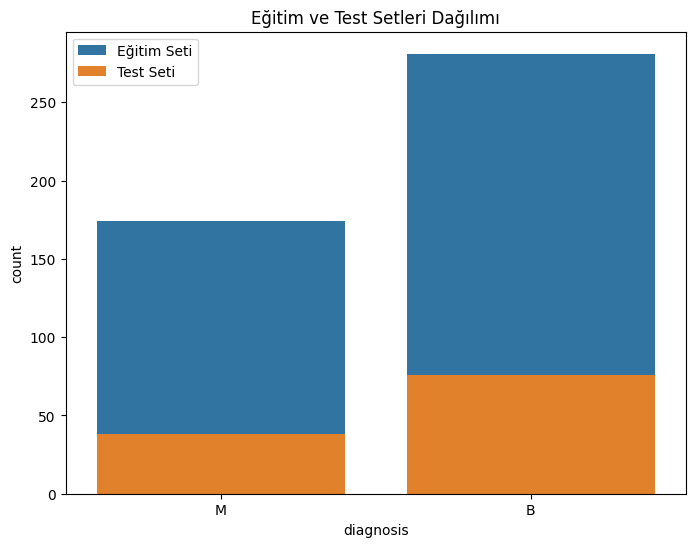

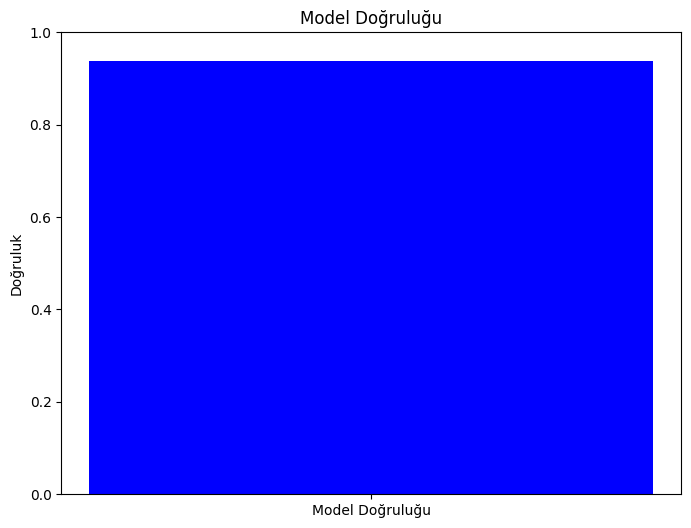

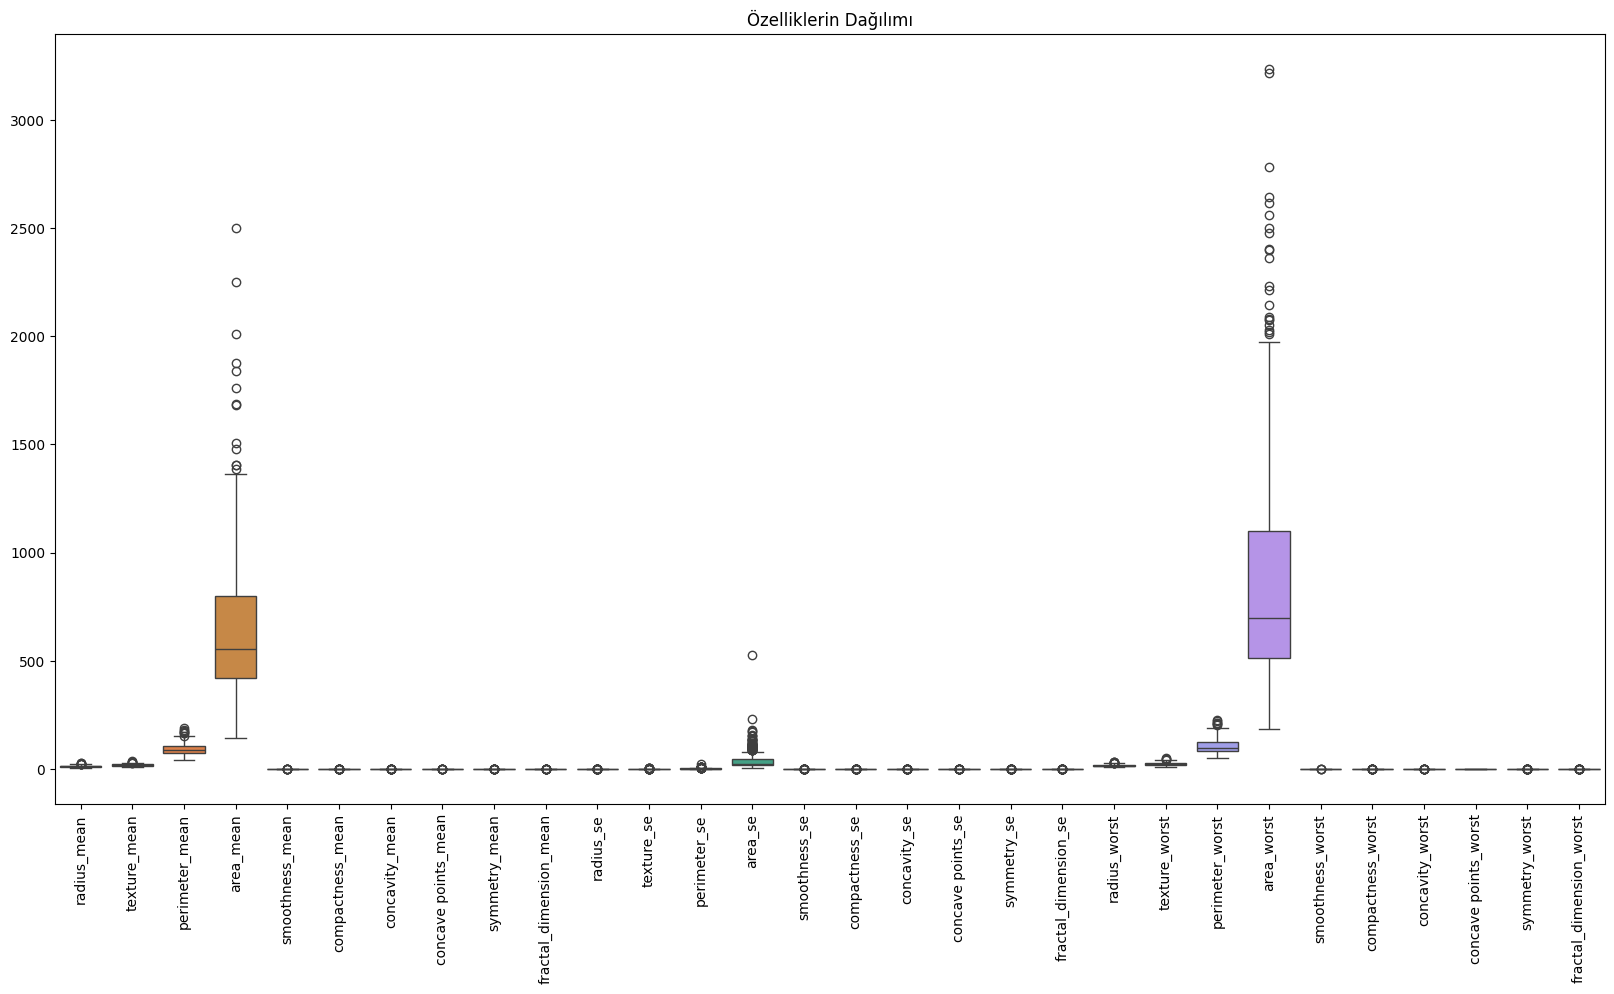

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train['diagnosis'], label='Eğitim Seti')
sns.countplot(x=y_test['diagnosis'], label='Test Seti')
plt.legend()
plt.title('Eğitim ve Test Setleri Dağılımı')
plt.show()

# Model doğruluğunu gösteren grafik
plt.figure(figsize=(8, 6))
plt.bar(['Model Doğruluğu'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.show()

# Özelliklerin dağılımını gösteren grafik
plt.figure(figsize=(20, 10))
sns.boxplot(data=x_train)
plt.xticks(rotation=90)
plt.title('Özelliklerin Dağılımı')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>